<h1 style='text-align: center;'>UK Road Accidents Data Analysis</h1>
<hr>

<h2>Import Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
from scipy.stats import f_oneway
import seaborn as sns
warnings.filterwarnings("ignore")

<h2>Load Dataset into Data Frame</h2>

In [2]:
data = pd.read_csv('dataset\\uk_road_accident.csv')

<h2>Check DataFrame Information</h2>

In [3]:
data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>Basic Descriptive Statistic</h2>

In [4]:
data.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h2>Check for Null Values</h2>

In [5]:
data.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>Fill Null Values</h2>

In [6]:
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].fillna(data['Road_Surface_Conditions'].mode()[0])
data['Road_Type'] = data['Road_Type'].fillna(data['Road_Type'].mode()[0])
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].fillna(data['Urban_or_Rural_Area'].mode()[0])
data['Weather_Conditions'] = data['Weather_Conditions'].fillna(data['Weather_Conditions'].mode()[0])

In [7]:
data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
data['Index'] = data['Index'].astype('str')
data['Accident_Severity'] = data['Accident_Severity'].astype('category')
data['Light_Conditions'] = data['Light_Conditions'].astype('category')
data['District Area'] = data['District Area'].astype('category')
data['Road_Surface_Conditions'] = data['Road_Surface_Conditions'].astype('category')
data['Road_Type'] = data['Road_Type'].astype('category')
data['Urban_or_Rural_Area'] = data['Urban_or_Rural_Area'].astype('category')
data['Weather_Conditions'] = data['Weather_Conditions'].astype('category')
data['Vehicle_Type'] = data['Vehicle_Type'].astype('category')

<h1 style='text-align: center;'>Exploratory Data Analysis</h1>

<h2>Question 1</h2>
<h3>Which District area has the most fatal accidents?</h3>

In [9]:
fatal_accidents = data[data['Accident_Severity'] == 'Fatal']
fatal_accidents['District Area'].value_counts().sort_values(ascending=False)

District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
                           ... 
Orkney Islands                2
Havant                        2
Stevenage                     1
Clackmannanshire              1
Harlow                        1
Name: count, Length: 422, dtype: int64

<h3>Insight 1:</h3>
<h4>The data shows that the Birmingham district area has the most fatal accidents among the district areas</h4>
<hr>

<h2>Question 2</h2>
<h3>What are the different categories of accident severity, and how many accidents fall into each?</h3>

In [10]:
data["Accident_Severity"].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3>Insight 2:</h3>
<h4>Most accidents are slight, and fatal accidents rarely occurs</h4>
<hr>

<h2>Question 3</h2>
<h3>Does the weather condition affect the severity of the accident?</h3>

In [11]:
bobo = data.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack(fill_value=0)
bobo

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7207,73285,454521
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


<h3>Insight 3:</h3>
<h4>We can see that weather Conditions plays a significant role in the severity of an accident.</h4>
<hr>

<h2>Question 4</h2>
<h3>Where do Serious Accidents mostly occur? Is it on Urban or Rural areas?</h3>

In [12]:
severe_accidents = data[data['Accident_Severity'] == 'Serious']

severe_accidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          50904
Rural          37312
Unallocated        1
Name: count, dtype: int64

<h3>Insight 4:</h3>
<h4>The data analysis shown above says that Serious accidents usually happen in Urban areas</h4>
<hr>

<h2>Question 5</h2>
<h3>What is the most common weather condition during accidents?</h3>

In [13]:
data["Weather_Conditions"].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h3>Insight 5:</h3>
<h4>Most accidents happened in fine weather, suggesting driver behavior is a bigger factor than poor weather.</h4>
<hr>

<h2>Question 6</h2>
<h3>Which vehicle type has the highest number of casualties?</h3>

In [14]:
data.groupby('Vehicle_Type')['Number_of_Casualties'].sum().sort_values(ascending=False)

Vehicle_Type
Car                                      676692
Van / Goods 3.5 tonnes mgw or under       46271
Bus or coach (17 or more pass seats)      34915
Motorcycle over 500cc                     34879
Goods 7.5 tonnes mgw and over             23397
Motorcycle 125cc and under                20348
Taxi/Private hire car                     18195
Motorcycle over 125cc and up to 500cc     10286
Motorcycle 50cc and under                 10167
Goods over 3.5t. and under 7.5t            8308
Other vehicle                              7554
Minibus (8 - 16 passenger seats)           2659
Agricultural vehicle                       2613
Pedal cycle                                 270
Data missing or out of range                  9
Ridden horse                                  5
Name: Number_of_Casualties, dtype: int64

<h3>Insight 6:</h3>
<h4>The data shows that cars contribute the most casualties.</h4>
<hr>

<h2>Question 7</h2>
<h3>What proportion of accidents occur in urban vs rural areas?</h3>

In [15]:
data["Urban_or_Rural_Area"].value_counts(normalize=True) * 100

Urban_or_Rural_Area
Urban          63.824944
Rural          36.173391
Unallocated     0.001665
Name: proportion, dtype: float64

<h3>Insight 7:</h3>
<h4>About two-thirds of accidents occurred in urban areas, likely because of heavier traffic.</h4>
<hr>

<h2>Question 8</h2>
<h3>Is there a correlation between the number of vehicle and the number of casualties?</h3>

In [16]:
data['Number_of_Casualties'].corr(data['Number_of_Vehicles'])

np.float64(0.2288888612692756)

<h3>Insight 8:</h3>
<h4>There is a positive correlation between number of vehicles and number of casualties</h4>
<hr>

<h2>Question 9</h2>
<h3>Which road type has the highest number of accidents?</h3>

In [17]:
data["Road_Type"].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h3>Insight 9:</h3>
<h4>Most accidents occurred on single carriageways, meaning it is more dangerous than others.
</h4>
<hr>

<h2>Question 10</h2>
<h3>In what light condition do accidents often happen?</h3>

In [18]:
data['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3>Insight 10:</h3>
<h4>The data analysis shown above says that its usually in Daylight that most accidents in the UK happends.
</h4>
<hr>

<h2>Question 11</h2>
<h3>Which weather condition has the highest average number of casualties?</h3>

In [19]:
data.groupby("Weather_Conditions")["Number_of_Casualties"].mean()

Weather_Conditions
Fine + high winds        1.386018
Fine no high winds       1.347397
Fog or mist              1.452948
Other                    1.354869
Raining + high winds     1.416641
Raining no high winds    1.408214
Snowing + high winds     1.418079
Snowing no high winds    1.341776
Name: Number_of_Casualties, dtype: float64

<h3>Insight 11:</h3>
<h4>The highest average casualties per accident happen during fog or mist, showing low visibility is particularly dangerous.
</h4>
<hr>

<h2>Question 12</h2>
<h3>Which district area had the most casualties in an accident?</h3>

In [20]:
highest_casualties = data['Number_of_Casualties'].max()
data[data['Number_of_Casualties'] == highest_casualties]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
117980,200743N002017,Fatal,3/1/2019,51.497547,Darkness - lights lit,South Bucks,-0.496697,68,1,Wet or damp,Slip road,Rural,Raining no high winds,Car


<h3>Insight 12:</h3>
<h4>The data analysis shown above says that the accident with the most casualties ever recorded in the dataset is in South Bucks district.</h4>
<hr>

<h2>Question 13</h2>
<h3>What's the average number of casualties by the severity of accident?</h3>

In [21]:
np.round(data.groupby('Accident_Severity')['Number_of_Casualties'].mean(),2)

Accident_Severity
Fatal      1.90
Serious    1.47
Slight     1.33
Name: Number_of_Casualties, dtype: float64

<h3>Insight 13:</h3>
<h4>The data above shows that the average number of casualties, be it in every severity of accidents does not exceeds to more than 2.</h4>
<hr>

<h2>Question 14</h2>
<h3>Which road surface condition has the highest accident severity?</h3>

In [22]:
data.groupby("Road_Surface_Conditions")["Accident_Severity"].value_counts()

Road_Surface_Conditions  Accident_Severity
Dry                      Slight               381049
                         Serious               61708
                         Fatal                  5790
Flood over 3cm. deep     Slight                  842
                         Serious                 152
                         Fatal                    23
Frost or ice             Slight                16317
                         Serious                2007
                         Fatal                   193
Snow                     Slight                 5290
                         Serious                 565
                         Fatal                    35
Wet or damp              Slight               160303
                         Serious               23785
                         Fatal                  2620
Name: count, dtype: int64

<h3>Insight 14:</h3>
<h4>Accidents on dry roads happens more frequently, but wet/icy conditions increase the likelihood of serious or fatal accidents..</h4>
<hr>

<h2>Question 15</h2>
<h3>In Urban areas, what type of road surface condition has the most accident happen? </h3>

In [23]:
urban_area = data[data['Urban_or_Rural_Area'] == 'Urban']

urban_area['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     303397
Wet or damp             107698
Frost or ice              7564
Snow                      2788
Flood over 3cm. deep       231
Name: count, dtype: int64

<h3>Insight 15:</h3>
<h4>Accidents mostly happens on dry roads in Urban areas.</h4>
<hr>

<h2>Question 16</h2>
<h3>Does the weather condition affect the severity of the accident?</h3>

In [24]:
data.groupby('Accident_Severity')['Weather_Conditions'].describe()

,count,unique,top,freq
Accident_Severity,,,,
Fatal,8661,8,Fine no high winds,7207
Serious,88217,8,Fine no high winds,73285
Slight,563801,8,Fine no high winds,454521


<h3>Insight 16:</h3>
<h4>The weather condition does not affect the assident's severity</h4>
<hr>

<h2>Question 17</h2>
<h3>How many total accidents are in the dataset?</h3>

In [25]:
len(data)

660679

<h3>Insight 17:</h3>
<h4>660,679 recorded accidents.</h4>
<hr>

<h2>Question 18</h2>
<h3>What is the average number of vehicles involved in accidents?</h3>

In [26]:
data["Number_of_Vehicles"].mean()

np.float64(1.8312554205597575)

<h3>Insight 18:</h3>
<h4>Most accidents involves only one vehicle</h4>
<hr>

<h2>Question 19</h2>
<h3>What is the maximum number of casualties recorded in a single accident?</h3>

In [27]:
data["Number_of_Casualties"].max()

np.int64(68)

<h3>Insight 19:</h3>
<h4>Maximum number of casualties in a single accident: 68</h4>
<hr>

<h2>Question 20</h2>
<h3>Which district area had the most accidents involving cars?</h3>

In [28]:
datas = data[data['Vehicle_Type'] == 'Car']['District Area'].value_counts().head(5)
datas

District Area
Birmingham    9600
Leeds         6875
Manchester    5248
Bradford      4749
Sheffield     4306
Name: count, dtype: int64

<h3>Insight 20:</h3>
<h4>The data shows that Birmingham had the most car road accidents</h4>
<hr>

<h2>Question 21</h2>
<h3>Which district area had the most accidents with slight severity </h3>

In [29]:
slight_accidents = data[data['Accident_Severity'] == 'Slight']
slight_accidents['District Area'].describe()

count         563801
unique           422
top       Birmingham
freq           11912
Name: District Area, dtype: object

<h3>Insight 21:</h3>
<h4>The data shows that Birmingham had the most slightly severe accidents</h4>
<hr>

In [30]:
data['Accident Date'] = data['Accident Date'].str.strip()
data['Accident Date'] = data['Accident Date'].astype('str')
data['Accident Date'] = data['Accident Date'].str.replace('/', '-')

In [31]:
data['Accident Date'] = pd.to_datetime(data['Accident Date'], dayfirst = True, errors = 'coerce')

In [32]:
data.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [33]:
data['Year'] = data['Accident Date'].dt.year
data['Month'] = data['Accident Date'].dt.month
data['Day'] = data['Accident Date'].dt.day
data['DayOfWeek'] = data['Accident Date'].dt.dayofweek

In [34]:
data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

 <h2>Question 22</h2>
<h3>What year had the most number of accident?</h3>

In [35]:
data['Accident Date'].dt.year.value_counts()

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h3>Insight 22:</h3>
<h4>The data shows that the year 2019 had the most number of accident</h4>
<hr>

 <h2>Question 23</h2>
<h3>Is the month correlated to the road surface condition?</h3>

In [36]:
dffd = data.groupby(['Road_Surface_Conditions', 'Month']).size()
dffd.unstack()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Road_Surface_Conditions,,,,,,,,,,,,
Dry,22370,28340,40382,44460,46174,47029,43812,41580,45163,42577,28814,17846
Flood over 3cm. deep,142,48,48,24,55,109,124,80,69,70,152,96
Frost or ice,4770,3363,654,90,8,3,6,5,8,266,1480,7864
Snow,1366,1533,259,109,9,6,8,6,6,48,504,2036
Wet or damp,24224,16207,12743,7061,10106,9334,13495,12242,11209,16619,29474,23994


<h3>Insight 23:</h3>
<h4>The data shows that the month affects the road condition because of seasonal changes </h4>
<hr>

<h3>Insight 24:</h3>
<h4>We can see that frozen/snowy/wet roads is more frequent in the months of December to February because during these months, it's winter season in UK</h4>
<hr>

 <h2>Question 24</h2>
<h3>What day do accidents mostly happen?</h3>

In [37]:
import matplotlib.pyplot as plt

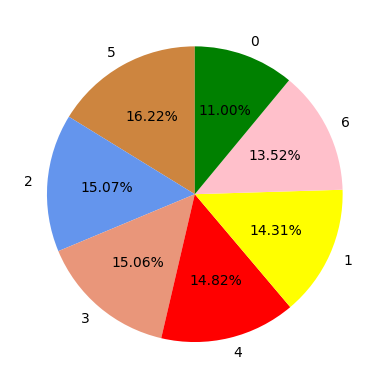

In [38]:
severity = data['DayOfWeek'].value_counts()

plt.pie(severity, 
        labels = severity.index,
        startangle= 90,
        autopct = '%1.2f%%',
        colors = ['Peru','Cornflowerblue','Darksalmon', 'red', 'yellow', 'pink', 'green'])
plt.show()

<h3>Insight 25:</h3>
<h4>Based on the chart above, accidents happen a lot during Saturdays, followed by Wednesday then Thursday </h4>
<hr>

<h1 style='text-align: center;'>Data Visualization of 6 District Areas</h1>
<hr>

<h2>Berwick-upon-Tweed Accidents Per Month</h2>
 

In [39]:
berwick = data[data['District Area'] == 'Berwick-upon-Tweed']

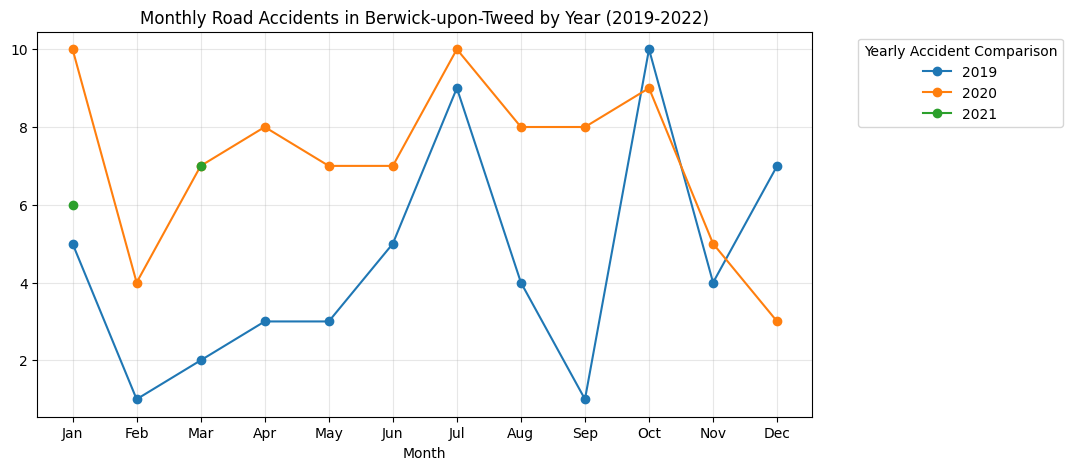

In [64]:
berwick_monthly = berwick.groupby(['Year', 'Month']).size()

berwick_monthly = berwick_monthly.unstack(level=0)

berwick_monthly.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Berwick-upon-Tweed by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.show()

<h3>Insight 26:</h3>
<h4>October consistently has the highest number of monthly road accidents, making it the most dangerous month for driving in Berwick-upon-Tweed. While accidents are generally lower in other months, they tend to spike significantly in October, reaching the highest points on the graph in both 2019 and 2020.</h4>
<hr>

<h2>Alnwick Accidents Per Month</h2>

In [73]:
Alnwick = data[(data['District Area'] == 'Alnwick') & (data['Vehicle_Type'] == 'Car')]

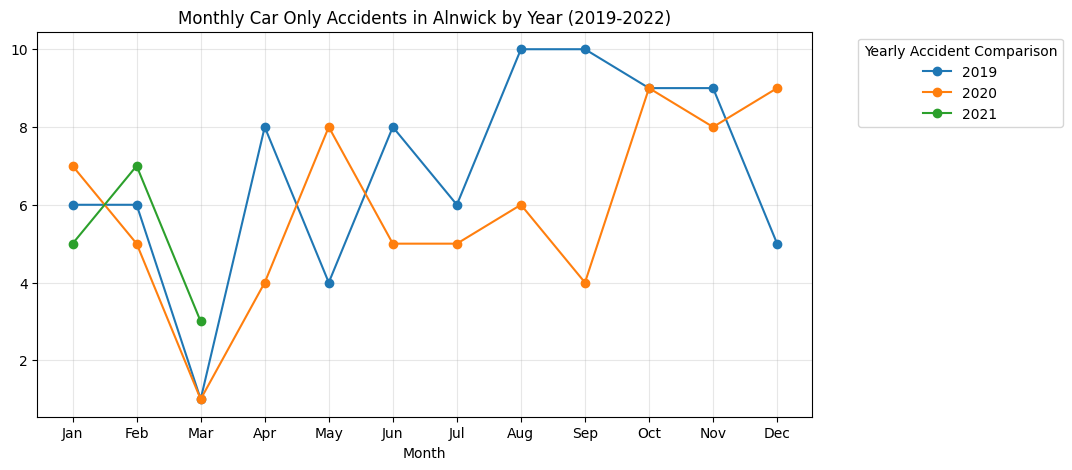

In [74]:
Alnwick_monthly = Alnwick.groupby(['Year', 'Month']).size()

Alnwick_monthly = Alnwick_monthly.unstack(level=0)

Alnwick_monthly.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Car Only Accidents in Alnwick by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.show()

<h3>Insight 27:</h3>
<h4>August and September were the most dangerous months for car-only accidents in 2019, The graph also shows a dramatic decrease in accidents in March across all years, suggesting it's the safest month for car-only travel in Alnwick. </h4>
<hr>

<h2>Erewash Accidents Per Month</h2>

In [108]:
Erewash = data[data['District Area'] == 'Erewash']

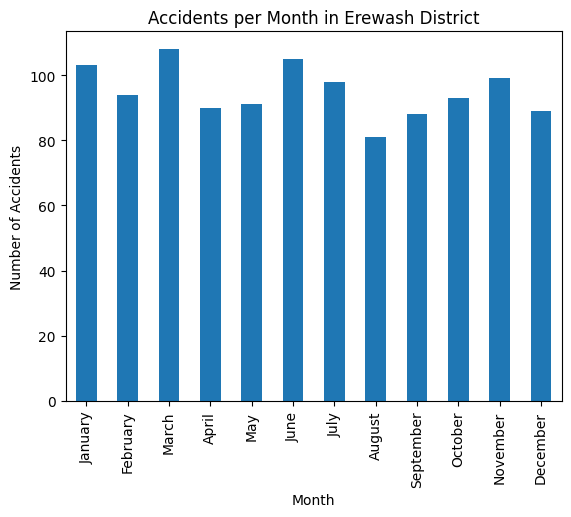

In [109]:

accidents_per_month = Erewash['Month'].value_counts().sort_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)
accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month in Erewash District')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

<h3>Insight 28:</h3>
<h4>Based on the graph, Erewash has a consistent and stable number of accidents throughout the year, with no significant seasonal variation. The number of accidents in Erewash remains close to 100 in every month.</h4>
<hr>

In [110]:
import folium 
from folium.plugins import HeatMap

<h2>Fife Fatal Accidents Heat Map</h2>


In [113]:
fife = data[data['District Area'] == 'Fife']
fife_fatal = fife[fife['Accident_Severity'] == 'Fatal']

In [112]:
locations  = list(zip(fife_fatal['Latitude'],fife_fatal['Longitude']))
m = folium.Map(location=[fife_fatal['Latitude'].mean(), fife_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)
m.save('accident_heatmap.html')  
m  

<h3>Insight 29:</h3>
<h4>Based on the heatmap, the highest concentration of incidents is along the A92 corridor connecting Dunfermline, Kirkcaldy, and Glenrothes. There are also significant clusters on the A91 near Cupar and St Andrews and on the coastal route near Crail. This data suggests that most fatal accidents are not random but are highly concentrated on these key major roads.</h4>
<hr>

<h2>Falkirk Fatal Car Accidents Heat Map</h2>

In [122]:
falkirk = data[(data['District Area'] == 'Falkirk') & (data['Vehicle_Type'] == 'Car') ]
falkirk_fatal = falkirk[falkirk['Accident_Severity'] == 'Fatal']

locations  = list(zip(falkirk_fatal['Latitude'],falkirk_fatal['Longitude']))
falkirk_map = folium.Map(locations=[falkirk_fatal['Latitude'].mean(), falkirk_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(falkirk_map)
falkirk_map.save('falkirk_accident_heatmap.html')  
falkirk_map  

<h3>Insight 30:</h3>
<h4>There are two major "hotspots", in the Camelon and Arnothill areas, and a third, distinct hotspot to the south. This indicates that road safety efforts in Falkirk should be focused on these precise locations, likely due to specific factors like busy intersections, high traffic volumes, or particular road features, to have the greatest impact on reducing accidents.</h4>
<hr>

<h2>Torbay Analysis</h2>

In [123]:
torbay = data[data['District Area'] == 'Torbay' ]
torbay_fatal = torbay[torbay['Accident_Severity'] == 'Fatal']

In [124]:
locations  = list(zip(torbay_fatal['Latitude'],torbay_fatal['Longitude']))
torbay_map = folium.Map(location=[torbay_fatal['Latitude'].mean(), torbay_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(torbay_map)
torbay_map.save('torbay_accident_heatmap.html')  
torbay_map  

<h3>Insight 31:</h3>
<h4>Based on the heatmap, the most dangerous areas for fatal accidents in Torbay are highly concentrated in three specific spots: Paignton, Churston Ferrers, and Torquay. This means that road safety efforts would be most effective by focusing on these exact locations rather than trying to improve all roads in the area.</h4>
<hr>